In [49]:
# Import Dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [50]:
# Make a reference to the crimes.csv file path
csv_path = "/Users/jstrawin/Desktop/Project3/Resources/Crimes_2019.csv"

# Import the crimes.csv file as a DataFrame
crimes_df = pd.read_csv(csv_path, encoding="utf-8")
crimes_df = crimes_df.dropna()
crimes_df['Date'] = pd.to_datetime(crimes_df['Date']).dt.date
crimes_df['Date'] = pd.to_datetime(crimes_df.Date,format='%Y-%m-%d %H:%M')
crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11858381,JC469488,2019-10-11,021XX W 72ND PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.68%,"(41.762038621, -87.676927902)",17.00%,22257.00%,65.00%,433.00%,31.00%,23.00%,17.00%,7.00%
1,11858167,JC469480,2019-10-11,046XX W HARRISON ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.74%,"(41.873224961, -87.741426819)",36.00%,22216.00%,26.00%,69.00%,14.00%,32.00%,16.00%,143.00%
2,11858286,JC469479,2019-10-11,081XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,-87.61%,"(41.747170897, -87.605119541)",9.00%,21546.00%,40.00%,247.00%,35.00%,61.00%,20.00%,235.00%
3,11858203,JC469489,2019-10-11,005XX W 61ST PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.64%,"(41.782606021, -87.638476359)",53.00%,21559.00%,66.00%,166.00%,4.00%,11.00%,17.00%,135.00%
4,11858205,JC469526,2019-10-11,007XX E 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,...,-87.61%,"(41.707455731, -87.605637491)",9.00%,21861.00%,47.00%,643.00%,35.00%,19.00%,10.00%,250.00%


In [51]:
### Check how many arrest are there
crimes_df.Arrest.value_counts()

False    157621
True      42667
Name: Arrest, dtype: int64

In [52]:
total_per = crimes_df.Arrest.mean()
print(total_per)

0.21302823933535708


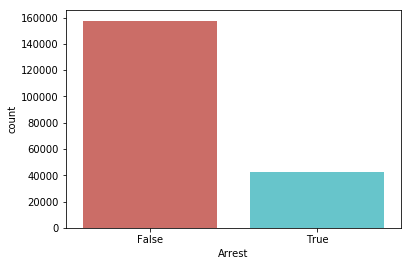

In [53]:
crimes_df.Arrest.value_counts()
sns.countplot(x = 'Arrest', data = crimes_df, palette = 'hls')
plt.show()

In [54]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "IUCR", "Primary Type", Arrest", "Community Area", "Date"

reduced_df = crimes_df.drop(["ID", "Case Number", "Block", "Description", "X Coordinate", "Y Coordinate", "Year", "Updated On",\
                             "Latitude", "Longitude", "Location","Boundaries - ZIP Codes", "Zip Codes","Historical Wards 2003-2015"\
                            ,"Census Tracts", "Police Districts", "Location Description", "Domestic", "Beat", "District", "FBI Code", "Community Areas", "Wards", "Police Beats"], axis=1)
reduced_df.head()

,Date,IUCR,Primary Type,Arrest,Ward,Community Area
0,2019-10-11,0810,THEFT,False,17.00%,67.00%
1,2019-10-11,143A,WEAPONS VIOLATION,True,24.00%,25.00%
2,2019-10-11,0460,BATTERY,False,8.00%,44.00%
3,2019-10-11,143A,WEAPONS VIOLATION,True,20.00%,68.00%
4,2019-10-11,1310,CRIMINAL DAMAGE,False,9.00%,50.00%


In [56]:
mean_IUCR = reduced_df.groupby('Primary Type').agg(['mean', 'count'])
print(mean_IUCR)

                                  Arrest          Ward        Community Area  \
                                    mean  count   mean  count           mean   
Primary Type                                                                   
ARSON                              0.07%    283 22.34%    283         40.14%   
ASSAULT                            0.18%  16409 21.61%  16409         39.85%   
BATTERY                            0.20%  39239 21.90%  39239         38.99%   
BURGLARY                           0.05%   7411 22.72%   7411         38.04%   
CONCEALED CARRY LICENSE VIOLATION  0.97%    178 22.07%    178         51.30%   
CRIM SEXUAL ASSAULT                0.05%   1251 24.41%   1251         34.55%   
CRIMINAL DAMAGE                    0.06%  21009 22.47%  21009         38.55%   
CRIMINAL TRESPASS                  0.56%   5381 23.98%   5381         36.01%   
DECEPTIVE PRACTICE                 0.05%  12417 26.41%  12417         31.78%   
GAMBLING                           1.00%

In [57]:
# Push the remade DataFrame to a new CSV file
mean_IUCR.to_csv("Output/Mean Primary.csv",
                  encoding="utf-8", index=True, header=True)